기존 Dataset 코드에서

```python
np.save('D:/git/LipService/x_save', x_data) # x_save.npy
np.save('D:/git/LipService/y_data', y_data) # y_data.npy
```

In [1]:
# fit, batch_size=32

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense, Dropout,Flatten
from keras.callbacks import EarlyStopping

In [3]:
x_data = np.load('lip/lip_x_data.npy') # x_save.npy
y_data = np.load('lip/lip_y_data.npy') # y_data.npy
y_data = keras.utils.to_categorical(y_data,11)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [4]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
#X_train = X_train / 255
print("X_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

X_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [5]:
import keras
from keras.applications.vgg16 import VGG16 

class VGG_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(VGG_LSTM, self).__init__()
        #self.BZ = input_shape[0]
        #self.frame = input_shape[1]

        self.vgg = TimeDistributed(VGG16(weights='imagenet', include_top=False, pooling=max))
        self.vgg.trainable = False

        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode='concat')
        self.dense = layers.Dense(num_classes, activation='softmax')
        self.max_pool = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())

    def call(self, x):
        x = self.vgg(x)
        x = self.flat(x)
        x = self.dropout(x)
        x = self.bilstm(x)
        return self.dense(x)

In [6]:
def get_model_vgg():
    return VGG_LSTM(num_classes = 11)

In [7]:
model = get_model_vgg()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#history = model.fit(X_train, Y_train, batch_size=16, epochs=5, verbose = 1, validation_data = (X_test, Y_test))
#model.summary()

In [8]:
es = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose = 1, validation_split=0.2, callbacks = [es])

Epoch 1/100
75/75 [==============================] - 1185s 14s/step - loss: 2.4423 - accuracy: 0.0910 - val_loss: 2.3252 - val_accuracy: 0.1017
Epoch 2/100
75/75 [==============================] - 1071s 14s/step - loss: 2.3301 - accuracy: 0.1109 - val_loss: 2.3302 - val_accuracy: 0.1100
Epoch 3/100
75/75 [==============================] - 1136s 15s/step - loss: 2.2998 - accuracy: 0.1261 - val_loss: 2.3184 - val_accuracy: 0.1000
Epoch 4/100
75/75 [==============================] - 1151s 15s/step - loss: 2.3027 - accuracy: 0.1046 - val_loss: 2.3217 - val_accuracy: 0.1000
Epoch 5/100
75/75 [==============================] - 1096s 15s/step - loss: 2.2840 - accuracy: 0.1312 - val_loss: 2.3338 - val_accuracy: 0.1017
Epoch 6/100
75/75 [==============================] - 1078s 14s/step - loss: 2.2717 - accuracy: 0.1365 - val_loss: 2.3041 - val_accuracy: 0.1033
Epoch 7/100
75/75 [==============================] - 1027s 14s/step - loss: 2.2512 - accuracy: 0.1499 - val_loss: 2.2498 - val_accuracy:

Epoch 58/100
75/75 [==============================] - 1015s 14s/step - loss: 0.2231 - accuracy: 0.9324 - val_loss: 1.1307 - val_accuracy: 0.6600
Epoch 59/100
75/75 [==============================] - 1009s 13s/step - loss: 0.2492 - accuracy: 0.9203 - val_loss: 1.1305 - val_accuracy: 0.6717
Epoch 60/100
75/75 [==============================] - 1026s 14s/step - loss: 0.2599 - accuracy: 0.9104 - val_loss: 1.0616 - val_accuracy: 0.6983


In [9]:
history.history

{'loss': [2.3736841678619385,
  2.323906660079956,
  2.306077480316162,
  2.3130834102630615,
  2.278691291809082,
  2.2694363594055176,
  2.2367846965789795,
  2.2019617557525635,
  2.1266555786132812,
  2.045783042907715,
  1.9312890768051147,
  1.8465427160263062,
  1.732082486152649,
  1.6656372547149658,
  1.5813803672790527,
  1.5221147537231445,
  1.434899926185608,
  1.389675259590149,
  1.3023451566696167,
  1.2806936502456665,
  1.1708571910858154,
  1.0951409339904785,
  1.1023153066635132,
  1.0160828828811646,
  0.960873544216156,
  0.9349949359893799,
  0.8908678293228149,
  0.8984541893005371,
  0.8232069611549377,
  0.8009129762649536,
  0.7514192461967468,
  0.6810087561607361,
  0.6706679463386536,
  0.6707481145858765,
  0.6073148846626282,
  0.5795688629150391,
  0.5590687394142151,
  0.5819255709648132,
  0.5290732979774475,
  0.51679527759552,
  0.450525164604187,
  0.439744770526886,
  0.43179550766944885,
  0.4111941158771515,
  0.3709065616130829,
  0.370746016

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


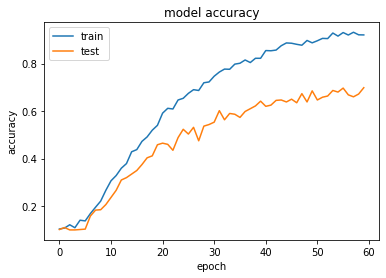

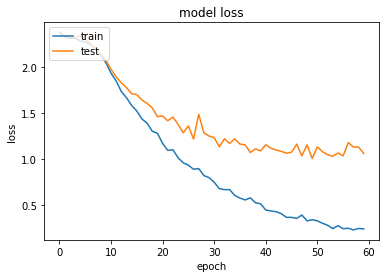

In [10]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()